In [1]:
#Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
from scipy.stats import zscore #to remove outliers
import requests
import io
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing dataset

In [4]:
df = pd.read_csv("bigdatamart_Train.csv")

# eda

In [5]:
df.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800


In [6]:
df.shape # check the data dimension

(8523, 12)

In [7]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df.columns # check the column names for EDA

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
#Changing categorical data into numeric data

In [12]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['Item_Identifier'] = labelencoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = labelencoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = labelencoder.fit_transform(df['Item_Type'])
df['Item_MRP'] = labelencoder.fit_transform(df['Item_MRP'])
df['Outlet_Identifier'] = labelencoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = labelencoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = labelencoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = labelencoder.fit_transform(df['Outlet_Type'])
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,5592,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,473,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,2901,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,4227,0,1998,3,2,0,732.3800
4,1297,8.930,1,0.000000,9,627,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,4955,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,2023,7,2002,3,1,1,549.2850
8520,1357,10.600,1,0.035186,8,1263,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,1857,3,2009,1,2,2,1845.5976


## handle null values

In [13]:
df.isna().sum() #check for null values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

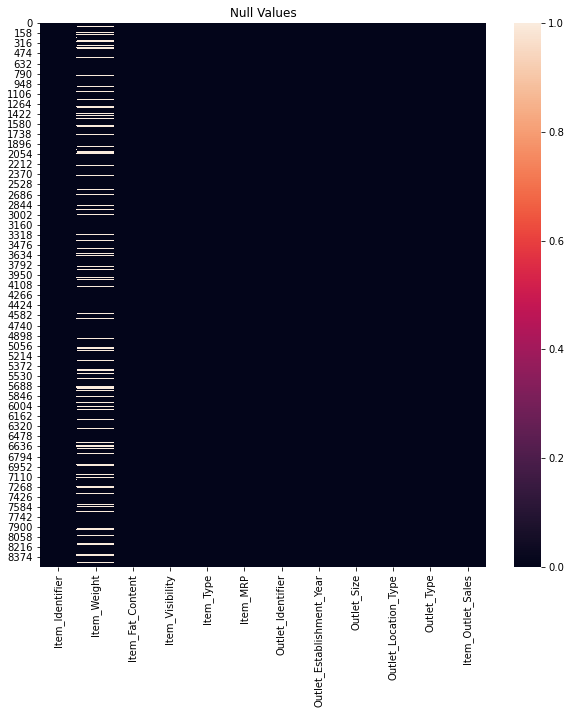

In [14]:
plt.figure(figsize = (10,10))
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [15]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

## check for outliers

In [16]:
#remove outliers before skewness check and before x, y split

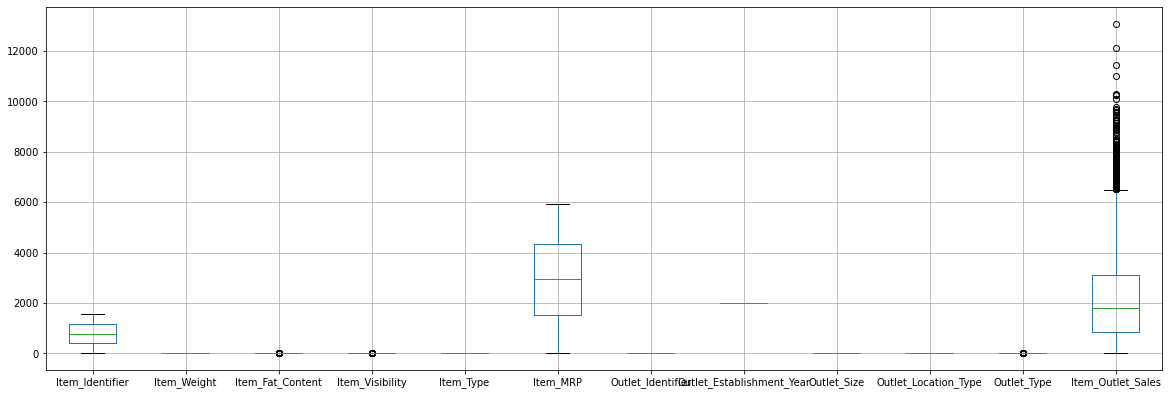

In [17]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [18]:
#Removing outliers by z score

In [19]:
from scipy.stats import zscore
z = np.abs(zscore(df))
new_df = df[(z<3).all(axis=1)]

In [20]:
new_df.shape

(8222, 12)

In [21]:
df.shape

(8523, 12)

In [22]:
dataloss = ((8523-8222)/8523)*100

In [23]:
dataloss

3.5316203214830457

In [24]:
#Outliers are not removed since they are present in the target variable

## check co-relation

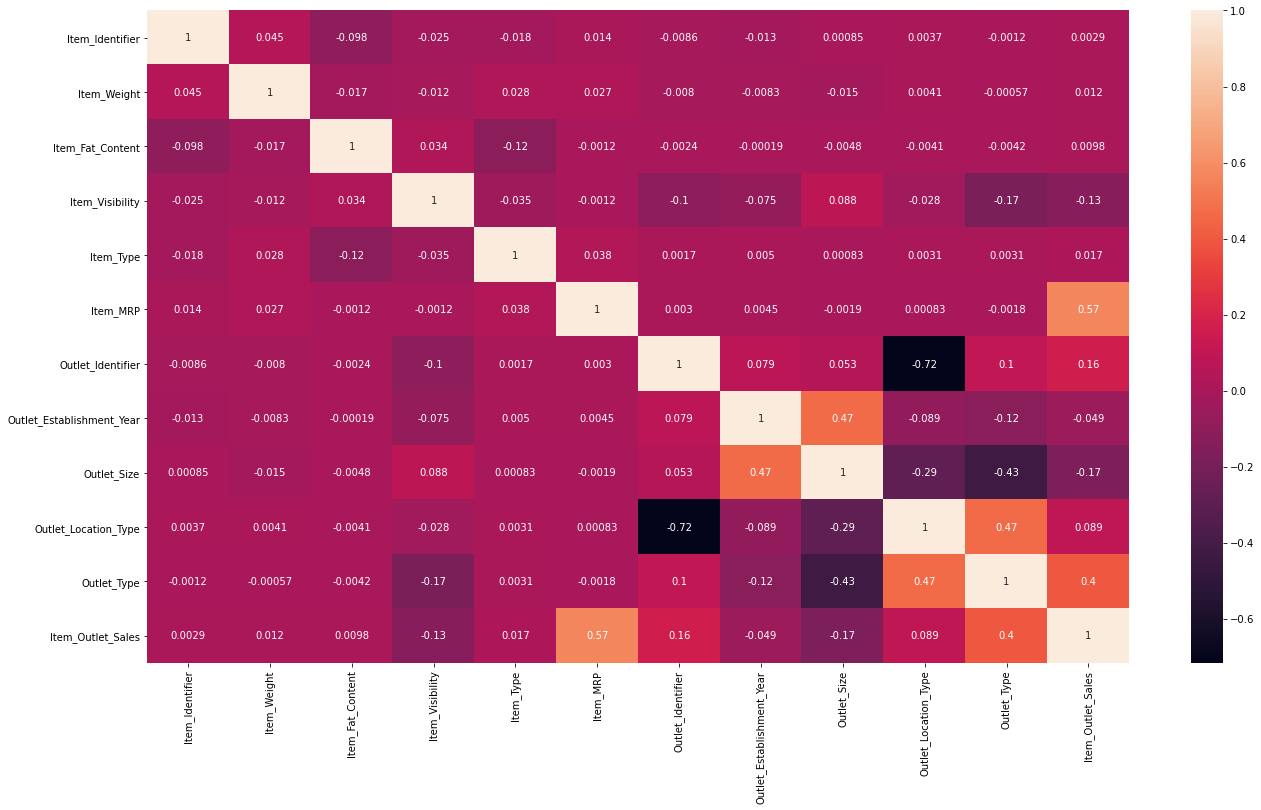

In [25]:
plt.figure(figsize=[22,12])
cor = df.corr()
sns.heatmap(cor, annot = True)
plt.show()

In [26]:
#Arrange co-relation in descending order. Dropping columns should be the last option to prevent data loss.

In [27]:
cor["Item_Outlet_Sales"].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.566501
Outlet_Type                  0.401522
Outlet_Identifier            0.162325
Outlet_Location_Type         0.089367
Item_Type                    0.017048
Item_Weight                  0.011550
Item_Fat_Content             0.009800
Item_Identifier              0.002869
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Outlet_Size                 -0.172477
Name: Item_Outlet_Sales, dtype: float64

In [28]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [29]:
columns = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']

In [30]:
#sns.pairplot(df[columns])

## check for skewness

In [31]:
x = df.drop('Item_Outlet_Sales',axis=1)
y = df['Item_Outlet_Sales']

In [32]:
x.skew() # check skewness

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.000902
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.131895
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
dtype: float64

In [33]:
from sklearn.preprocessing import power_transform
df_new = power_transform(x)

df_new = pd.DataFrame(df_new, columns = x.columns)

In [34]:
df_new.skew()

Item_Identifier             -0.293700
Item_Weight                 -0.068024
Item_Fat_Content             0.032643
Item_Visibility              0.124279
Item_Type                   -0.164574
Item_MRP                    -0.287450
Outlet_Identifier           -0.213935
Outlet_Establishment_Year   -0.200959
Outlet_Size                 -0.150886
Outlet_Location_Type        -0.220632
Outlet_Type                  0.007863
dtype: float64

In [35]:
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-1.461039,-0.822636,-0.520977,-1.146886,-0.712347,1.446492,1.427394,0.048562,-0.739700,-1.373843,-0.123488
1,-2.093858,-1.733801,1.009871,-1.037100,1.504660,-1.582777,-0.548577,1.461925,-0.739700,1.088324,1.040591
2,-0.154018,1.086362,-0.520977,-1.122375,0.684390,0.070891,1.427394,0.048562,-0.739700,-1.373843,-0.123488
3,0.773522,1.447728,1.009871,-1.745551,-0.215420,0.779466,-1.809119,-0.075796,1.272069,1.088324,-1.915952
4,1.098294,-0.917588,-0.520977,-1.745551,0.468410,-1.445028,-1.343810,-1.270835,-1.769546,1.088324,-0.123488
...,...,...,...,...,...,...,...,...,...,...,...
8518,-0.844393,-1.468096,-0.520977,0.020310,1.305304,1.141588,-1.343810,-1.270835,-1.769546,1.088324,-0.123488
8519,0.338073,-1.060659,1.009871,-0.221388,-1.923750,-0.448684,0.810513,0.439191,1.272069,-0.131113,-0.123488
8520,1.206073,-0.496556,-0.520977,-0.542979,0.246996,-0.952252,0.489168,0.714912,0.271990,-0.131113,-0.123488
8521,-0.112559,-1.373443,1.009871,1.459990,1.305304,-0.553415,-0.548577,1.461925,-0.739700,1.088324,1.040591


In [36]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,1,0.016047,4,5592,9,1999,1,0,1
1,8,5.920,2,0.019278,14,473,3,2009,1,2,2
2,662,17.500,1,0.016760,10,2901,9,1999,1,0,1
3,1121,19.200,2,0.000000,6,4227,0,1998,3,2,0
4,1297,8.930,1,0.000000,9,627,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,4955,1,1987,0,2,1
8519,897,8.380,2,0.046982,0,2023,7,2002,3,1,1
8520,1357,10.600,1,0.035186,8,1263,6,2004,2,1,1
8521,681,7.210,2,0.145221,13,1857,3,2009,1,2,2


In [37]:
#x = df_new

## test train split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

## regression

In [39]:
#Linear Regression

Coefficients: 
 [-1.14234549e-02  2.84203347e-01  3.15062780e+01 -1.92261080e+03
 -4.54234141e+00  5.80531572e-01  5.50113051e+01 -4.03939505e+00
  1.16300738e+00 -7.57953652e+01  8.56999668e+02]
MAE: 870.4795429206836
MSE: 1319930.472998087
RMSE: 1148.882271165365
Variance: 0.5094423623079067


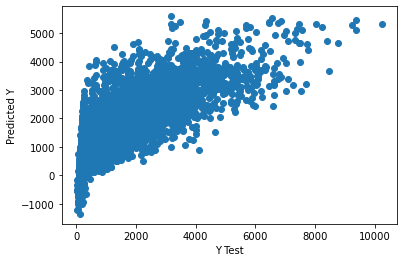

In [40]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)
print('Coefficients: \n', lm.coef_)
predictions = lm.predict(x_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Variance:',metrics.explained_variance_score(y_test, predictions))

In [41]:
#CatBoostRegressor

0:	learn: 1428.4718580	total: 141ms	remaining: 1.27s
1:	learn: 1286.5441649	total: 145ms	remaining: 581ms
2:	learn: 1201.9676402	total: 149ms	remaining: 348ms
3:	learn: 1165.1910972	total: 154ms	remaining: 230ms
4:	learn: 1136.5902427	total: 158ms	remaining: 158ms
5:	learn: 1128.1404734	total: 162ms	remaining: 108ms
6:	learn: 1120.1085803	total: 166ms	remaining: 71.2ms
7:	learn: 1115.2633314	total: 170ms	remaining: 42.6ms
8:	learn: 1111.9150000	total: 174ms	remaining: 19.4ms
9:	learn: 1110.3279044	total: 178ms	remaining: 0us
MAE: 748.318869904117
MSE: 1080074.5317936228
RMSE: 1039.266343048606
Variance: 0.598839515315073


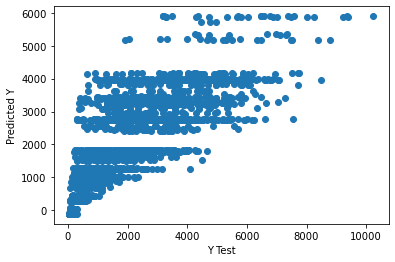

In [42]:
from catboost import CatBoostRegressor
# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=10,learning_rate=0.5,depth=2)
# Fit model
model.fit(x_train,y_train)
# Get predictions
preds = model.predict(x_test)

plt.scatter(y_test,preds)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('Variance:',metrics.explained_variance_score(y_test, preds))

In [43]:
#decisiontreeregressor

MAE: 729.8920915270127
MSE: 1062691.8280370166
RMSE: 1030.8694524705913
Variance: 0.6049973237164328


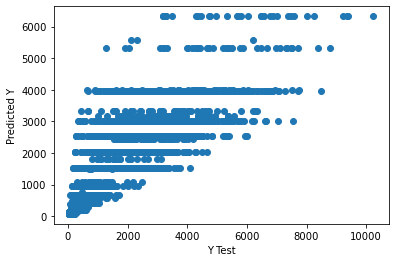

In [44]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x_train,y_train)

# Predict
preds = regr_1.predict(x_test)

# Plot the results
plt.scatter(y_test,preds)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('Variance:',metrics.explained_variance_score(y_test, preds))

## check cross-validation scores

In [45]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(lm, x, y, cv=5)
print("CrossValidation Score of LinearRegression Model: ", scr.mean())

CrossValidation Score of LinearRegression Model:  0.49864967659567283


In [46]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(regr_1, x, y, cv=5)
print("CrossValidation Score of Decision Tree Model: ", scr.mean())

CrossValidation Score of Decision Tree Model:  0.5898880343838422


In [47]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(model, x, y, cv=5)
print("CrossValidation Score of Catboost Model: ", scr.mean())

0:	learn: 1389.5599333	total: 1.6ms	remaining: 14.4ms
1:	learn: 1251.6124977	total: 3.08ms	remaining: 12.3ms
2:	learn: 1171.3366982	total: 4.5ms	remaining: 10.5ms
3:	learn: 1130.7116177	total: 6.27ms	remaining: 9.4ms
4:	learn: 1110.6163195	total: 7.62ms	remaining: 7.62ms
5:	learn: 1097.2712278	total: 9.53ms	remaining: 6.35ms
6:	learn: 1088.0554713	total: 11.1ms	remaining: 4.75ms
7:	learn: 1084.5587479	total: 12.7ms	remaining: 3.17ms
8:	learn: 1083.4979524	total: 14.2ms	remaining: 1.58ms
9:	learn: 1081.6679888	total: 15.7ms	remaining: 0us
0:	learn: 1410.0974906	total: 1.43ms	remaining: 12.9ms
1:	learn: 1265.4219004	total: 2.76ms	remaining: 11ms
2:	learn: 1186.1726127	total: 4.05ms	remaining: 9.46ms
3:	learn: 1140.4767354	total: 5.47ms	remaining: 8.21ms
4:	learn: 1118.0226436	total: 6.81ms	remaining: 6.81ms
5:	learn: 1104.4267763	total: 8.13ms	remaining: 5.42ms
6:	learn: 1097.5913081	total: 9.44ms	remaining: 4.05ms
7:	learn: 1091.2913484	total: 10.7ms	remaining: 2.68ms
8:	learn: 1089.344

## hyper parameter tuning

In [48]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs.fit(x_train, y_train)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 5, 'min_samples_split': 50}
1233115.9523710716


In [49]:
new_model = DecisionTreeRegressor(max_depth=5,
                                  min_samples_split=50)
#or new_model = gs.best_estimator_
new_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=50)

## saving the model

In [50]:
import joblib
joblib.dump(new_model, "model.pkl") #rename as per project name
prediction = new_model.predict(x_test)

## loading the saved model

In [51]:
model = joblib.load("model.pkl")

In [52]:
prediction = model.predict(x_test)

In [53]:
print(accuracy_score(y_test,prediction)*100)

ValueError: continuous is not supported

In [ ]:
prediction = pd.DataFrame(prediction) # converting into dataframe

In [ ]:
prediction.to_csv("Results.csv")